# TensolFlow

## base

### constant

In [1]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [2]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.76290103 0.01484905 0.9107161 ]
 [0.45352773 0.70642146 0.18080355]]
x: [[0.762901   0.01484905 0.9107161 ]]
x: [[0.45352772 0.70642143 0.18080355]]


### variables

In [3]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
Instructions for updating:
Colocations handled automatically by placer.
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### [try]
-  noiseの値を変更しよう
-  dの数値を変更しよう
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Generation: 10. 誤差 = 0.28677246
Generation: 20. 誤差 = 0.2142531
Generation: 30. 誤差 = 0.1859216
Generation: 40. 誤差 = 0.16420808
Generation: 50. 誤差 = 0.1475063
Generation: 60. 誤差 = 0.13465932
Generation: 70. 誤差 = 0.12477738
Generation: 80. 誤差 = 0.11717619
Generation: 90. 誤差 = 0.111329384
Generation: 100. 誤差 = 0.10683205
Generation: 110. 誤差 = 0.10337271
Generation: 120. 誤差 = 0.10071175
Generation: 130. 誤差 = 0.098664925
Generation: 140. 誤差 = 0.09709059
Generation: 150. 誤差 = 0.095879555
Generation: 160. 誤差 = 0.094948046
Generation: 170. 誤差 = 0.09423151
Generation: 180. 誤差 = 0.09368036
Generation: 190. 誤差 = 0.09325643
Generation: 200. 誤差 = 0.092930324
Generation: 210. 誤差 = 0.09267946
Generation: 220. 誤差 = 0.09248653
Generation: 230. 誤差 = 0.092338145
Generation: 240. 誤差 = 0.09222397
Generation: 250. 誤差 = 0.092136145
Generation: 260. 誤差 = 0.09206861
Generation: 270. 誤差 = 0.09201666
Generation: 280. 誤差 = 0.0919767
Generation: 290. 誤差 = 0.09194596
Generation: 300. 誤差 = 0.09192233
[3.0200126]
[1.9

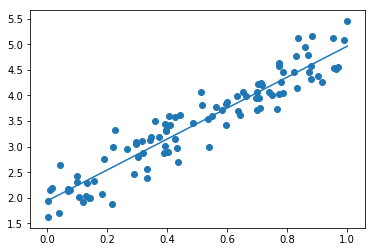

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.3           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()